In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import cv2
import random

In [8]:
DATA_DIR = "/Users/abhraneelsaha/Desktop/oral_cancer_data"
SET = ["train","test"]
CATEGORIES = ["Normal","OSCC"]

In [48]:
#processing for training set

training_data = []

PARENT_PATH = os.path.join(DATA_DIR,SET[0])
for category in CATEGORIES:
    category_num = CATEGORIES.index(category)
    PATH = os.path.join(PARENT_PATH,category)
    for img in os.listdir(PATH):
        IMG_PATH = os.path.join(PATH,img)
        img_array = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)
        img_resize_array = img_array.resize(224,224)
        training_data.append([img_array,category_num])
        

        

In [35]:
print(len(training_data))

4946


In [49]:
random.shuffle(training_data)


In [66]:
x_train = []
y_train = []

for feature,label in training_data:
    x_train.append(feature)
    y_train.append(label)

x_train = np.array(x_train).reshape(-1,224,224,1)
y_train = np.array(y_train)
x_train = x_train/255

In [67]:
x_train.shape

(4946, 224, 224, 1)

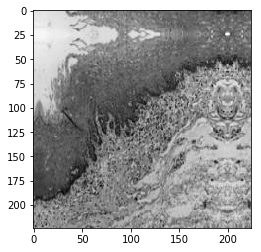

In [62]:
plt.imshow(x_train[3],cmap = "gray")
plt.show()

In [71]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(128,(3,3),2,input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),2,input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation("softmax"))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [72]:
model.fit(x_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 5)

Epoch 1/5
140/140 [==============================] - 54s 376ms/step - loss: 0.7964 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4929
Epoch 2/5
140/140 [==============================] - 52s 368ms/step - loss: 0.6939 - accuracy: 0.4988 - val_loss: 0.6930 - val_accuracy: 0.5071
Epoch 3/5
140/140 [==============================] - 51s 366ms/step - loss: 0.6935 - accuracy: 0.4990 - val_loss: 0.6934 - val_accuracy: 0.4929
Epoch 4/5
140/140 [==============================] - 53s 376ms/step - loss: 0.6934 - accuracy: 0.5071 - val_loss: 0.6937 - val_accuracy: 0.4929
Epoch 5/5
140/140 [==============================] - 51s 364ms/step - loss: 0.6935 - accuracy: 0.5086 - val_loss: 0.6931 - val_accuracy: 0.5071


# CHANGES -> BY : AG

UPORER GULO MODDHE LAST TA RUN KORIS NA

In [ ]:
trnaccur = []
testaccur = []

for i in range(1,25):
    model.fit(x_train, y_train, batch_size = 32, validation_split = 0.1, epochs = i)
    trnaccur.append(model.accuracy())

similary for the test data

plot both of them in plt

plt.plot(trnaccur,np.linspace(1,25)) <br/>
plt.plot(testaccur,np.linspace(1,25))<br/>
intersection is the best